### Lab 2 | Handwritten Digit Recognition System

Problem Statement
- Developing a handwritten digital recognition system by creating a neural network model trained on MNIST dataset "handwritten digits from 0 to 9"

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import confusion_matrix
import seaborn as sns

### Loading Dataset

In [ ]:
train_data = pd.read_csv("mnist_train.csv")
test_data = pd.read_csv("mnist_test.csv")
print(train_data.head())

   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      5    0    0    0    0    0    0    0    0    0  ...      0      0   
1      0    0    0    0    0    0    0    0    0    0  ...      0      0   
2      4    0    0    0    0    0    0    0    0    0  ...      0      0   
3      1    0    0    0    0    0    0    0    0    0  ...      0      0   
4      9    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 785 columns]


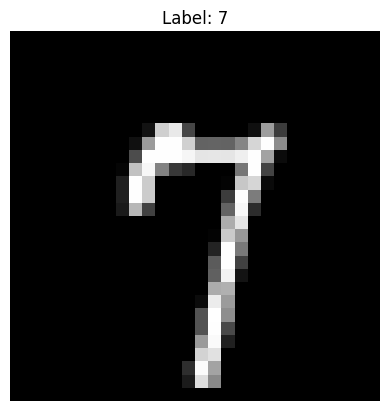

In [ ]:
# import matplotlib.pyplot as plt

sample_image = X_train[0] 
sample_label = y_train[0] 
sample_image = sample_image.reshape(28, 28)

plt.imshow(sample_image, cmap='gray')
plt.title(f"Label: {sample_label}")
plt.axis('off') 
plt.show()

### Data Split

In [ ]:
X_temp = train_data.iloc[:,1:].values
y_temp = train_data.iloc[:, 0].values

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=10000, stratify=y_temp, random_state=42)

X_test = test_data.iloc[:, 1:].values
y_test = test_data.iloc[:, 0].values

### Normalization

In [4]:
X_test = X_test / 255.0
X_train = X_train / 255.0
X_val = X_val / 255.0

### Tensors

In [ ]:

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)

X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)


### Loaders for batches usage

In [ ]:
batch_size = 32 

# Datasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Dataloaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


### Neural Network Design

In [ ]:
class FeedforwardNN(nn.Module):
    def __init__(self):
        super(FeedforwardNN, self).__init__()
    
        # Neurons number assumed: 128 then 64
        self.l1 = nn.Linear(784, 128)
        self.l2 = nn.Linear(128, 64)  
        self.output = nn.Linear(64, 10)

        self.activation_fn = nn.ReLU()

    def forward(self, x):
        x = self.activation_fn(self.l1(x)) 
        x = self.activation_fn(self.l2(x)) 
        x = self.output(x) 
        return x


### Neural Network Creation

In [11]:
model = FeedforwardNN()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

### Training

In [ ]:
train_losses = []
train_accuracies = []

epochs = 10 
for epoch in range(epochs):
    model.train() 
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:

        inputs = inputs.view(-1, 784)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0) 
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = 100 * correct / total
    
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)

    print(f'Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%')



Epoch [1/10], Loss: 0.1543, Accuracy: 95.51%
Epoch [2/10], Loss: 0.1441, Accuracy: 95.86%
Epoch [3/10], Loss: 0.1351, Accuracy: 96.10%
Epoch [4/10], Loss: 0.1268, Accuracy: 96.39%
Epoch [5/10], Loss: 0.1193, Accuracy: 96.64%
Epoch [6/10], Loss: 0.1123, Accuracy: 96.79%
Epoch [7/10], Loss: 0.1062, Accuracy: 96.97%
Epoch [8/10], Loss: 0.1001, Accuracy: 97.18%
Epoch [9/10], Loss: 0.0949, Accuracy: 97.30%
Epoch [10/10], Loss: 0.0900, Accuracy: 97.45%


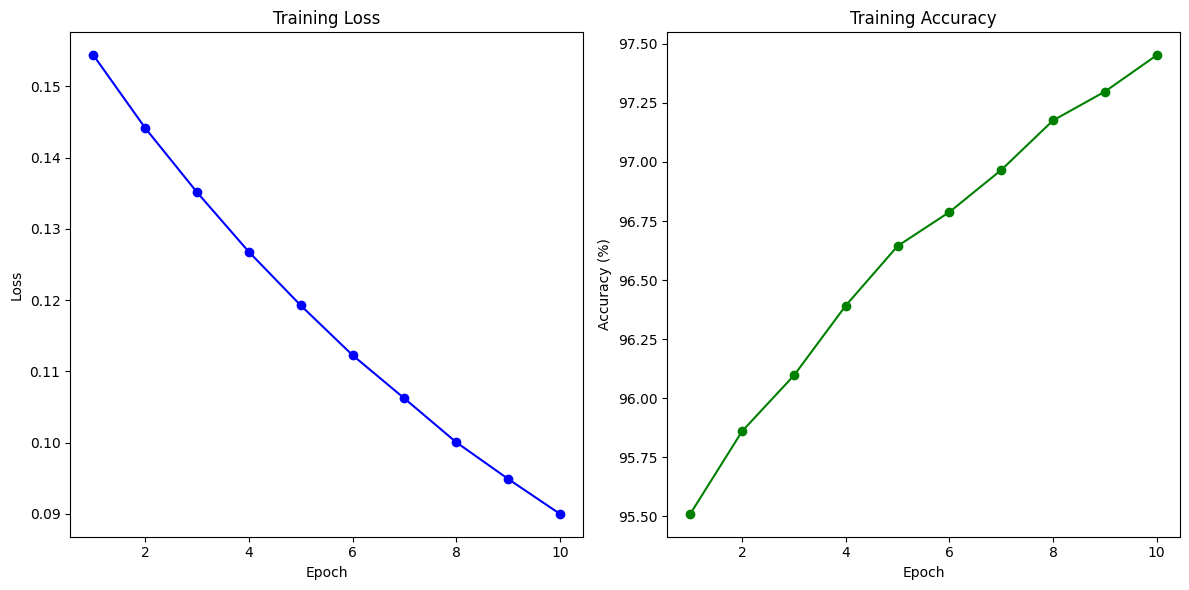

In [ ]:
import matplotlib.pyplot as plt

# Plot the training loss
plt.figure(figsize=(12, 6))

# Plot loss
plt.subplot(1, 2, 1)  # First subplot (left side)
plt.plot(range(1, epochs + 1), train_losses, marker='o', color='blue')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Plot accuracy
plt.subplot(1, 2, 2)  # Second subplot (right side)
plt.plot(range(1, epochs + 1), train_accuracies, marker='o', color='green')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')

# Show the plots
plt.tight_layout()
plt.show()


# Testing

In [ ]:
model.eval() 
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.view(-1, 784)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)  #index of max value (predicted class)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f'Test Accuracy: {test_accuracy:.2f}%')


Test Accuracy: 96.81%


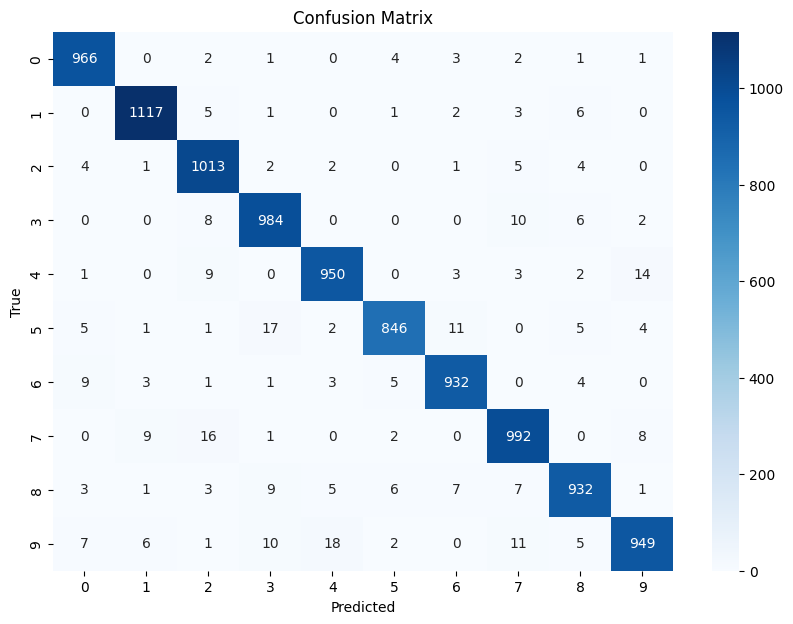

In [ ]:
# Get predictions and true labels from the test set
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.view(-1, 784)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        all_preds.extend(predicted.numpy())  # Save predicted labels
        all_labels.extend(labels.numpy())   # Save true labels

# Generate confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[str(i) for i in range(10)], yticklabels=[str(i) for i in range(10)])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


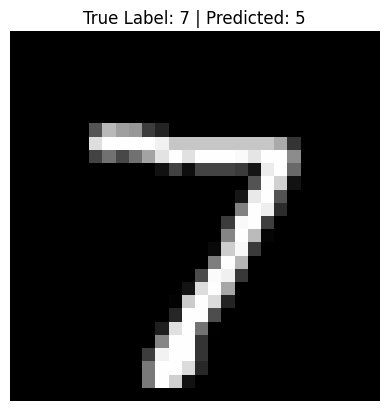

In [ ]:
sample_image = X_test[0] 
true_label = y_test[0]

sample_image = sample_image.reshape(1, -1) 
sample_image = torch.tensor(sample_image).float() / 255.0

model.eval()
with torch.no_grad():
    output = model(sample_image)
    _, predicted = torch.max(output, 1)

plt.imshow(X_test[0].reshape(28, 28), cmap='gray')
plt.title(f"True Label: {true_label} | Predicted: {predicted.item()}")
plt.axis('off')
plt.show()
